In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./../data/spotify_dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [42]:
print(f"Shape inicial: {df.shape}")
print("\nValores nulos iniciales:")
print(df.isnull().sum())

Shape inicial: (113549, 21)

Valores nulos iniciales:
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_sec        0
dtype: int64


In [ ]:
df[df['artists'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [11]:
print(f"Shape antes de eliminar nulos: {df.shape}")
df.dropna(inplace=True)
print(f"Shape después de eliminar nulos: {df.shape}")

Shape antes de eliminar nulos: (114000, 21)
Shape después de eliminar nulos: (113999, 21)


In [14]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("Columna 'Unnamed: 0' eliminada.")

Columna 'Unnamed: 0' eliminada.


In [15]:
num_duplicates_track_id = df.duplicated(subset=['track_id']).sum()
print(f"Número de track_id duplicados: {num_duplicates_track_id}")

Número de track_id duplicados: 24259


In [16]:
num_duplicates_rows = df.duplicated().sum()
print(f"Número de filas completamente duplicadas: {num_duplicates_rows}")
if num_duplicates_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Filas duplicadas eliminadas. Nuevo shape: {df.shape}")

Número de filas completamente duplicadas: 450
Filas duplicadas eliminadas. Nuevo shape: (113549, 20)


In [17]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [18]:
print("\nConteo de Valores Únicos:")
print(f"Artistas únicos: {df['artists'].nunique()}")
print(f"Álbumes únicos: {df['album_name'].nunique()}")
print(f"Canciones únicas (nombre): {df['track_name'].nunique()}")
print(f"IDs de canciones únicos: {df['track_id'].nunique()}")
print(f"Géneros únicos: {df['track_genre'].nunique()}")


Conteo de Valores Únicos:
Artistas únicos: 31437
Álbumes únicos: 46589
Canciones únicas (nombre): 73608
IDs de canciones únicos: 89740
Géneros únicos: 114


In [19]:
print("\nTop 10 Géneros más frecuentes:")
print(df['track_genre'].value_counts().head(10))


Top 10 Géneros más frecuentes:
track_genre
acoustic       1000
british        1000
electronic     1000
emo            1000
funk           1000
garage         1000
disco          1000
country        1000
rock           1000
rock-n-roll    1000
Name: count, dtype: int64


In [20]:
print("\nTop 10 Artistas más frecuentes:")
print(df['artists'].value_counts().head(10))


Top 10 Artistas más frecuentes:
artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Prateek Kuhad      217
Feid               201
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64


In [21]:
print("\nDistribución de Explicit:")
print(df['explicit'].value_counts(normalize=True) * 100)


Distribución de Explicit:
explicit
False    91.44158
True      8.55842
Name: proportion, dtype: float64


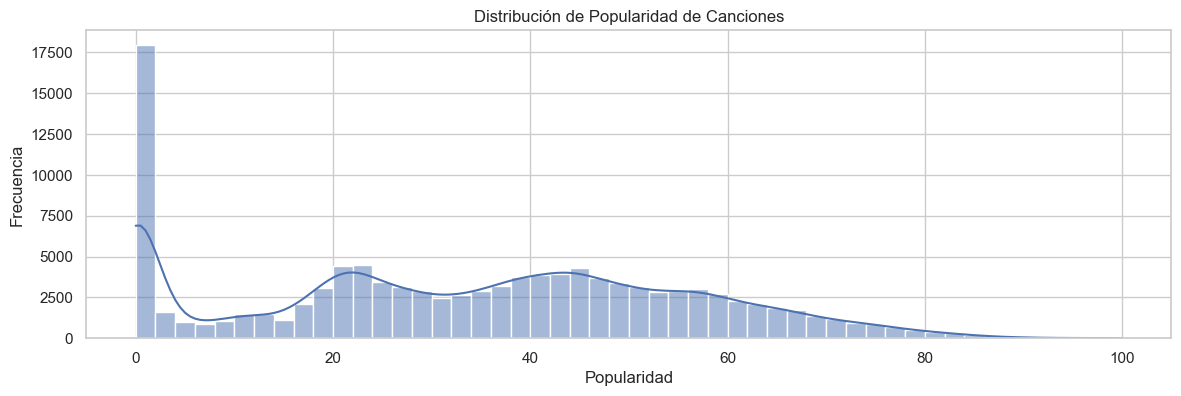

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title('Distribución de Popularidad de Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

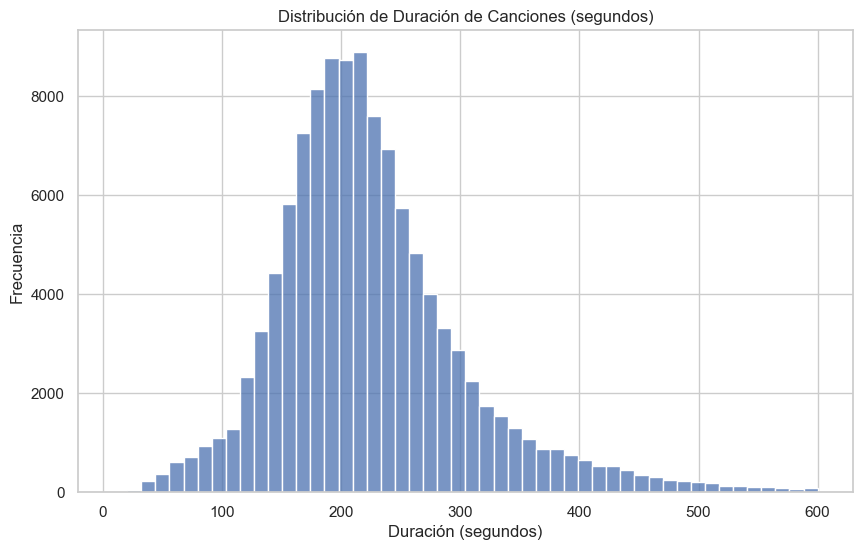

In [26]:
df['duration_sec'] = df['duration_ms'] / 1000
plt.figure(figsize=(10, 6))
sns.histplot(df[df['duration_sec'] < 600]['duration_sec'], bins=50, kde=False) # Menos de 10 minutos
plt.title('Distribución de Duración de Canciones (segundos)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

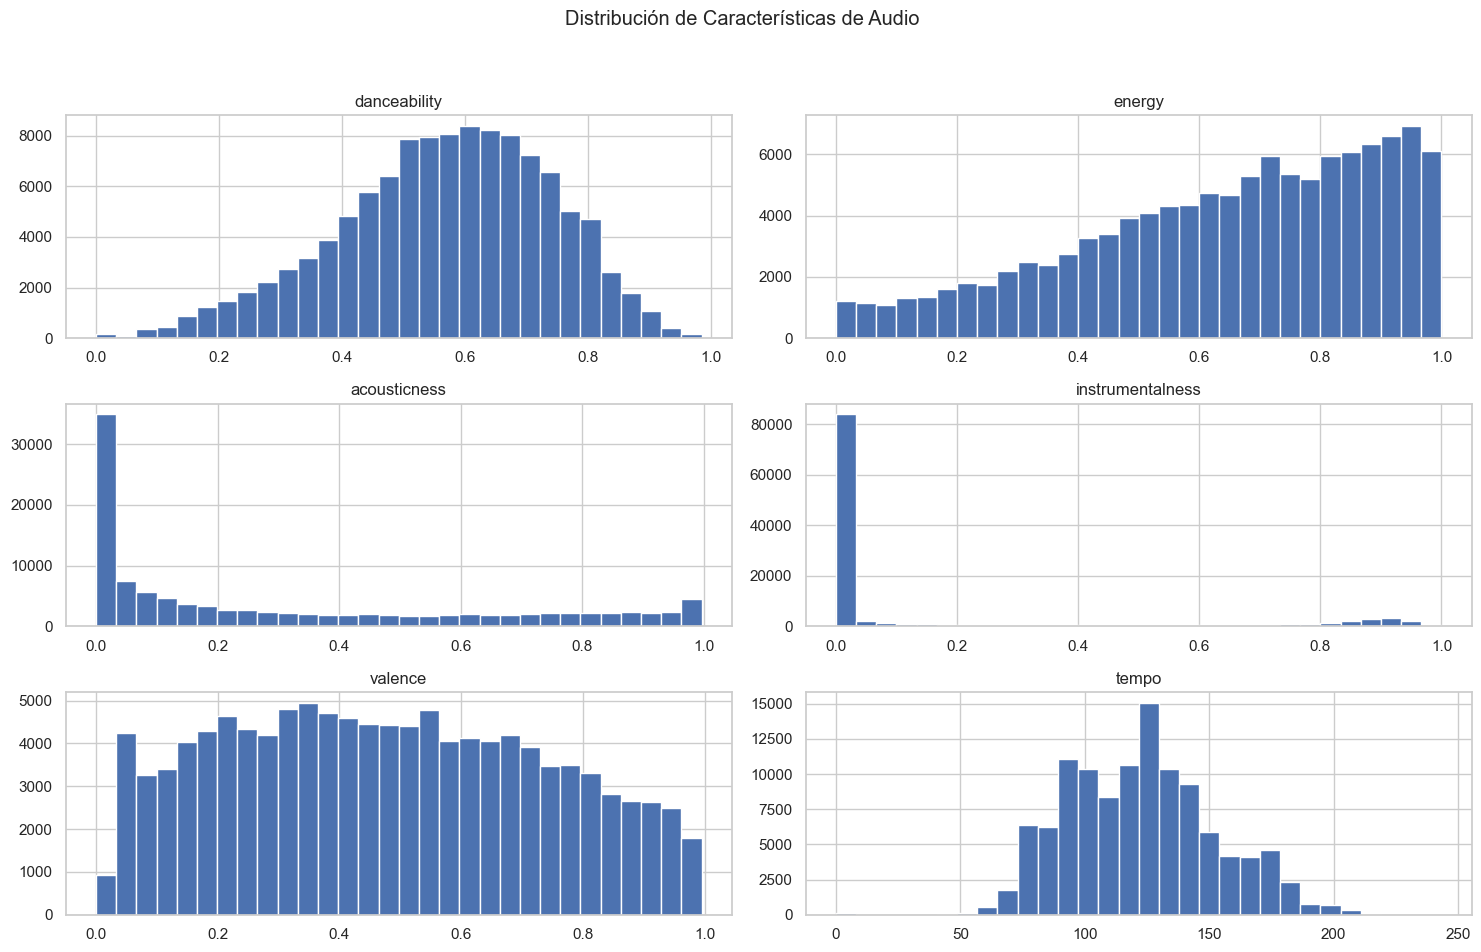

In [27]:
audio_features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
df[audio_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de Características de Audio')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el supertítulo
plt.show()

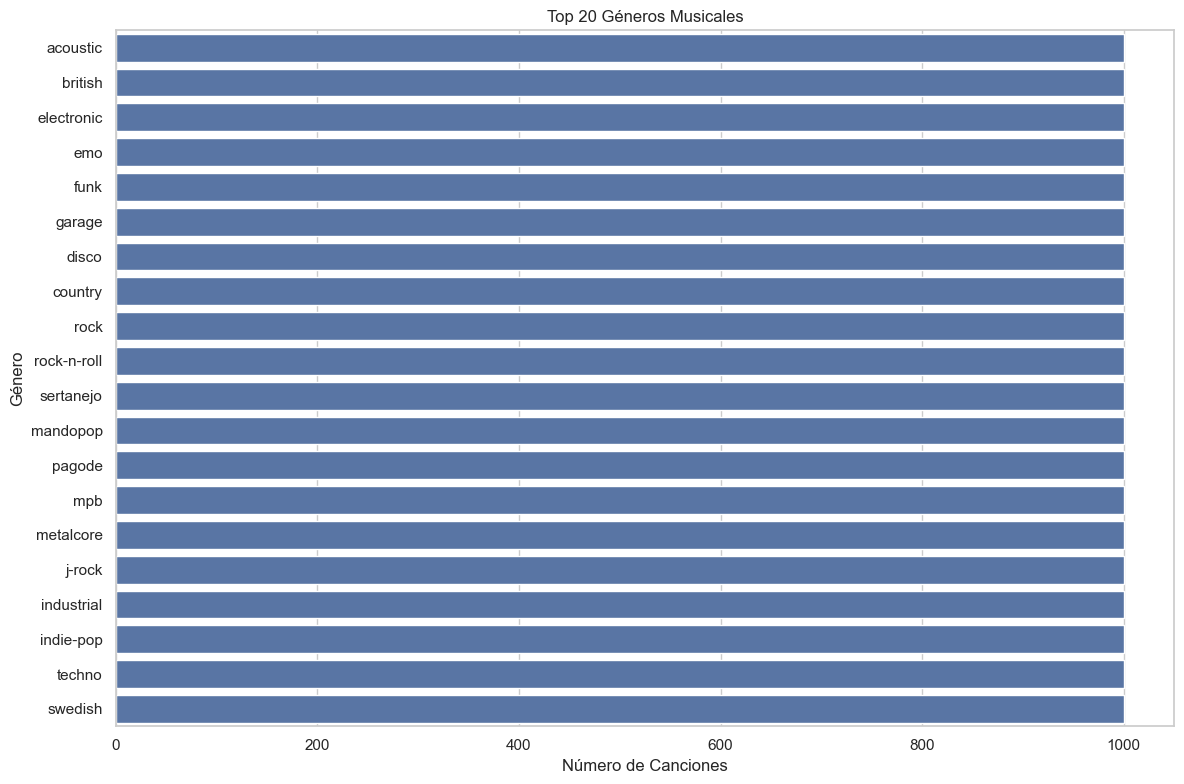

In [28]:
plt.figure(figsize=(12, 8))
top_genres = df['track_genre'].value_counts().nlargest(20).index
sns.countplot(y='track_genre', data=df[df['track_genre'].isin(top_genres)], order=top_genres)
plt.title('Top 20 Géneros Musicales')
plt.xlabel('Número de Canciones')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

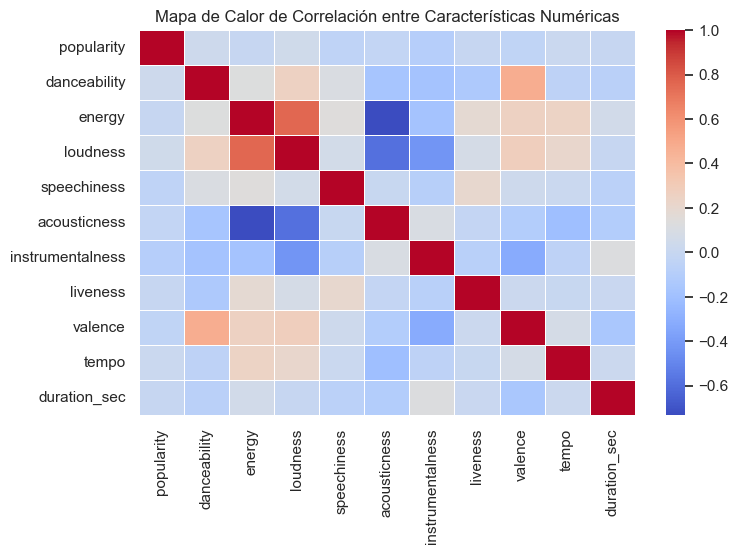

In [33]:
plt.figure(figsize=(8, 5))
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('duration_ms')
numeric_cols.remove('key')
numeric_cols.remove('mode')
numeric_cols.remove('time_signature')
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) # annot=True si quieres ver los valores
plt.title('Mapa de Calor de Correlación entre Características Numéricas')
plt.show()

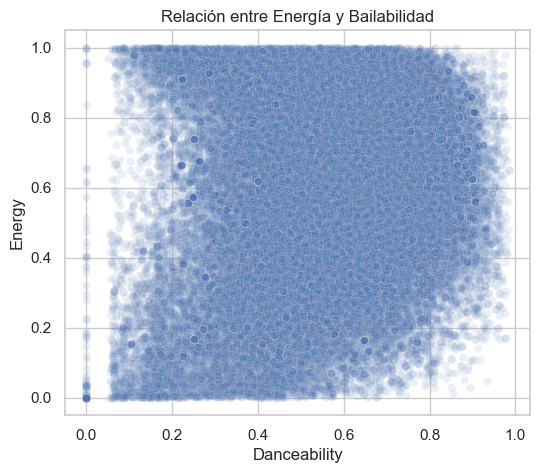

In [36]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='danceability', y='energy', data=df, alpha=0.1)
plt.title('Relación entre Energía y Bailabilidad')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

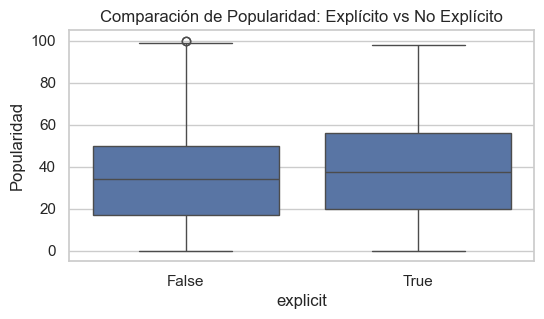

In [39]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Comparación de Popularidad: Explícito vs No Explícito')
plt.ylabel('Popularidad')
plt.show()

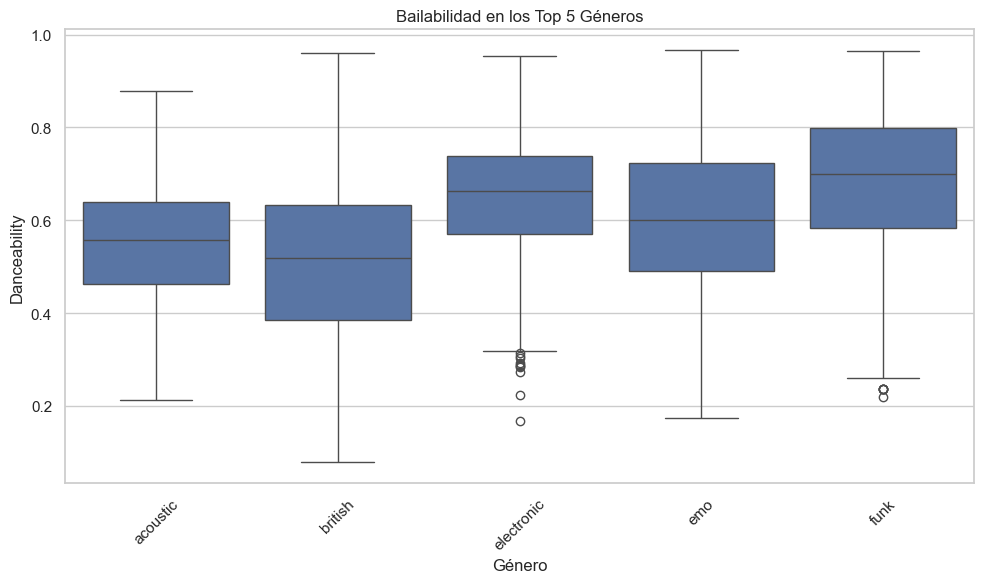

In [40]:
plt.figure(figsize=(10, 6))
top5_genres = df['track_genre'].value_counts().nlargest(5).index
sns.boxplot(x='track_genre', y='danceability', data=df[df['track_genre'].isin(top5_genres)], order=top5_genres)
plt.title('Bailabilidad en los Top 5 Géneros')
plt.xlabel('Género')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
popular_songs = df[df['popularity'] > 90]
print(f"\nNúmero de canciones con popularidad > 90: {len(popular_songs)}")
print("Estadísticas descriptivas de canciones muy populares:")
print(popular_songs[audio_features + ['popularity', 'duration_sec']].describe())

print("\nComparación de medias (Popular > 90 vs Resto):")
comparison = pd.DataFrame({
    'Popular (>90)': popular_songs[audio_features].mean(),
    'Resto': df[df['popularity'] <= 90][audio_features].mean()
})
print(comparison)


Número de canciones con popularidad > 90: 68
Estadísticas descriptivas de canciones muy populares:
       danceability     energy  acousticness  instrumentalness    valence  \
count     68.000000  68.000000     68.000000         68.000000  68.000000   
mean       0.720912   0.673265      0.199452          0.002835   0.447765   
std        0.141823   0.141300      0.222966          0.007111   0.215366   
min        0.440000   0.317000      0.000307          0.000000   0.131000   
25%        0.618750   0.578250      0.060000          0.000002   0.286000   
50%        0.733000   0.686000      0.090100          0.000013   0.419000   
75%        0.834250   0.756000      0.294000          0.000291   0.557500   
max        0.950000   0.965000      0.891000          0.033000   0.912000   

            tempo  popularity  duration_sec  
count   68.000000   68.000000     68.000000  
mean   114.935088   94.411765    201.926118  
std     23.644980    2.564018     36.530641  
min     67.528000   91